Source: https://www.youtube.com/watch?v=Lsue2gEM9D0

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
genes = ['gene_' + str(i) for i in range(1, 101)]

wt = ['wt_' + str(i) for i in range(1, 6)]
ko = ['ko_' + str(i) for i in range(1, 6)]

In [3]:
# the stars unpack the 'wt' and 'ko' arrays so that the column names are a single array that looks like this:
# [wt_1, wt_2, wt_3, wt_4, wt_5, ko_1, ko_2, ko_3, ko_4, ko_5] without the stars we would create an array of two arrays and
# that wouldn't create ten columns like we want:
# [[wt_1, wt_2, wt_3, wt_4, wt_5], [ko_1, ko_2, ko_3, ko_4, ko_5]]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)
print(data.shape)
data.head()

(100, 10)


,wt_1,wt_2,wt_3,wt_4,wt_5,ko_1,ko_2,ko_3,ko_4,ko_5
gene_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for gene in data.index:
    data.loc[gene, 'wt_1': 'wt_5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko_1': 'ko_5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [5]:
data.head()

,wt_1,wt_2,wt_3,wt_4,wt_5,ko_1,ko_2,ko_3,ko_4,ko_5
gene_1,763,711,731,728,784,377,400,391,390,433
gene_2,725,765,708,696,713,396,389,393,407,378
gene_3,500,506,522,533,491,756,776,740,777,753
gene_4,457,445,411,471,487,724,727,711,746,757
gene_5,870,896,850,847,885,148,113,130,140,134


In [6]:
# We are passing in the transpose of our data the scale function expects the samples to be in rows instead of columns note we
# use samples as columns in this example because that is often how genomic data is stored

scaled_data = preprocessing.scale(data.T)

### **Principal Component Analysis**

In [7]:
pca = PCA()

In [8]:
pca.fit(scaled_data)

PCA()

In [ ]:
pca_data = pca.transform(scaled_data)

### **Scree plot**

In [10]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

In [11]:
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

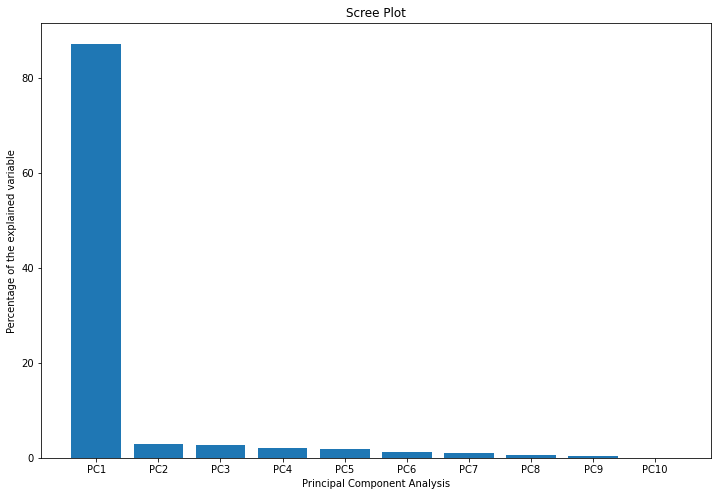

In [15]:
plt.figure(figsize=(12,8))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of the explained variable')
plt.xlabel('Principal Component Analysis')
plt.title('Scree Plot')
plt.show()